In [15]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


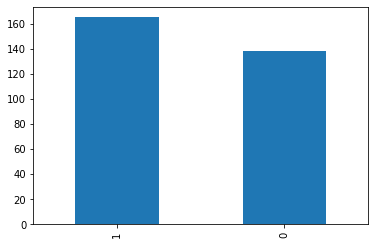

In [18]:
df.target.value_counts().plot(kind='bar')
plt.show()

In [19]:
X= df.iloc[:,:-1]   #[: ,0:-1]
y = df['target']
print(X.shape,y.shape)

(303, 13) (303,)


In [20]:
featSelector = SelectKBest(chi2,k=2)
featSelector.fit(X,y)
print(featSelector.scores_)
print(featSelector.get_feature_names_out())


[ 23.28662399   7.57683451  62.59809791  14.8239245   23.93639448
   0.20293368   2.97827075 188.32047169  38.91437697  72.64425301
   9.8040952   66.44076512   5.79185297]
['thalach' 'oldpeak']


In [21]:
features = X[featSelector.get_feature_names_out()]
features.head()
scaler = StandardScaler()
scaledX= scaler.fit_transform(features)

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,random_state=1)


In [23]:
xtrain.shape


(242, 2)

In [24]:
clf = SVC(kernel='linear')
clf.fit(xtrain,ytrain)


SVC(kernel='linear')

In [25]:
ypred = clf.predict(xtrain)
print(confusion_matrix(ytrain,ypred))
print(classification_report(ytrain,ypred))

[[ 66  42]
 [ 22 112]]
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       108
           1       0.73      0.84      0.78       134

    accuracy                           0.74       242
   macro avg       0.74      0.72      0.73       242
weighted avg       0.74      0.74      0.73       242



In [26]:
from sklearn.decomposition import PCA


In [27]:
pca = PCA(n_components=3)
decomposed_x = pca.fit_transform(X)


In [28]:
import plotly.express as px


In [29]:
fig = px.scatter_3d(x=decomposed_x[:,0],y=decomposed_x[:,1],z=decomposed_x[:,2],color=y.values)
fig.write_html('mall data.html',auto_open=True)

In [30]:
from utils import plot_area_distribution


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


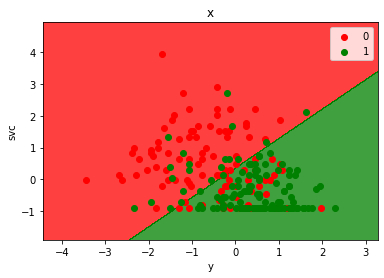

In [31]:
plot_area_distribution(clf,xtrain,ytrain,"x","y","svc")
